In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
train = pd.read_csv('train_human_activity.csv')
test = pd.read_csv('test_human_activity.csv')

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
test.shape

(2947, 563)

In [7]:
train.shape

(7352, 563)

In [8]:
train.nunique()

tBodyAcc-mean()-X       7347
tBodyAcc-mean()-Y       7352
tBodyAcc-mean()-Z       7349
tBodyAcc-std()-X        7349
tBodyAcc-std()-Y        7351
                        ... 
angle(X,gravityMean)    7352
angle(Y,gravityMean)    7352
angle(Z,gravityMean)    7352
subject                   21
Activity                   6
Length: 563, dtype: int64

In [9]:
sum(train.duplicated())

0

In [10]:
sum(test.duplicated())

0

In [11]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<Axes: xlabel='count', ylabel='Activity'>

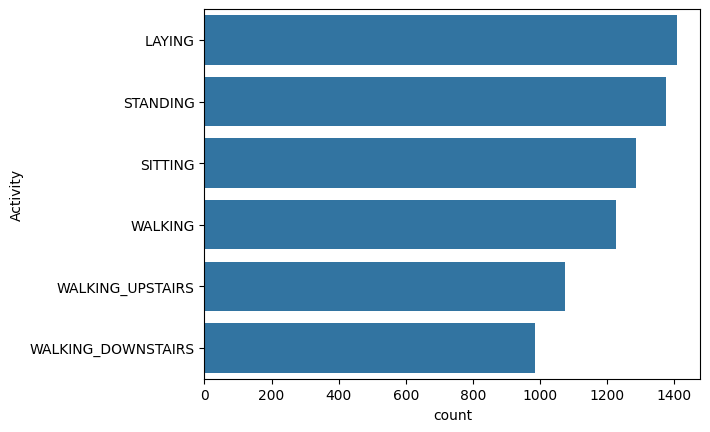

In [13]:
sns.countplot(train.Activity, order = train.Activity.value_counts().index)

In [14]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient="index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


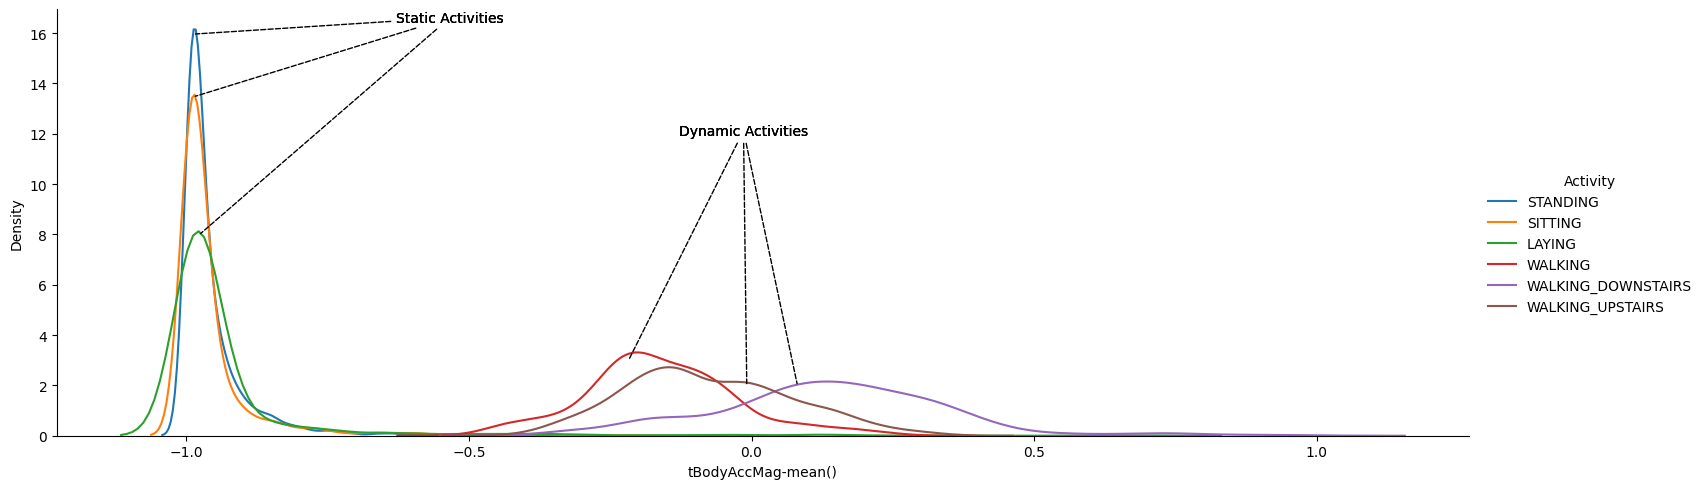

In [15]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3).map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# Place annotation within the range
plt.annotate("Static Activities",
             xy=(xmin + 0.25, ymax - 9),  # Adjust position based on your data
             xytext=(xmin + 0.6, ymax - 0.5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.annotate("Static Activities",
             xy=(xmin + 0.24, ymax - 3.5),  # Adjust position based on your data
             xytext=(xmin + 0.6, ymax - 0.5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.annotate("Static Activities",
             xy=(xmin + 0.24, ymax - 1),  # Adjust position based on your data
             xytext=(xmin + 0.6, ymax - 0.5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.annotate("Dynamic Activities",
             xy=(xmin + 1.01, ymax - 14),  # Adjust position based on your data
             xytext=(xmin + 01.1, ymax - 5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.annotate("Dynamic Activities",
             xy=(xmin + 1.22, ymax - 15),  # Adjust position based on your data
             xytext=(xmin + 01.1, ymax - 5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.annotate("Dynamic Activities",
             xy=(xmin + 1.31, ymax - 15),  # Adjust position based on your data
             xytext=(xmin + 01.1, ymax - 5), 
             arrowprops={'arrowstyle': '-', 'ls':'dashed'})

plt.show()

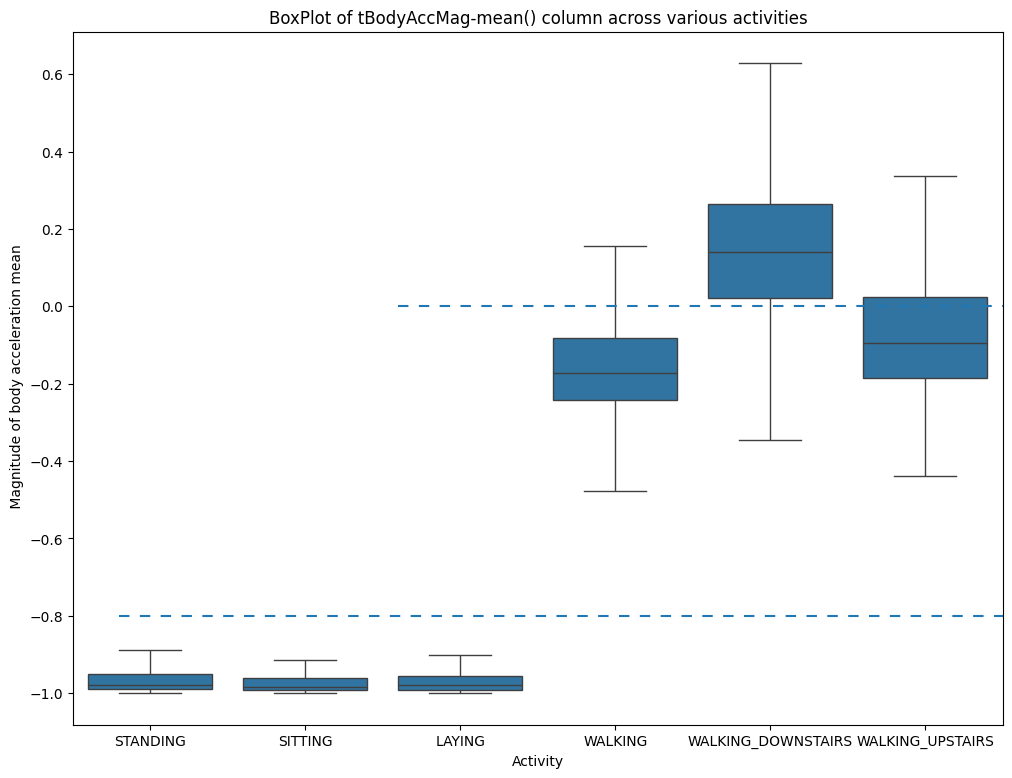

In [16]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=train, showfliers=False)
plt.ylabel(' Magnitude of body acceleration mean')
plt.title('BoxPlot of tBodyAccMag-mean() column across various activities')
plt.axhline(y= -0.8, xmin=0.05, dashes=(5, 5))
plt.axhline(y= 0.0, xmin=0.35, dashes=(5, 5))
plt.show()

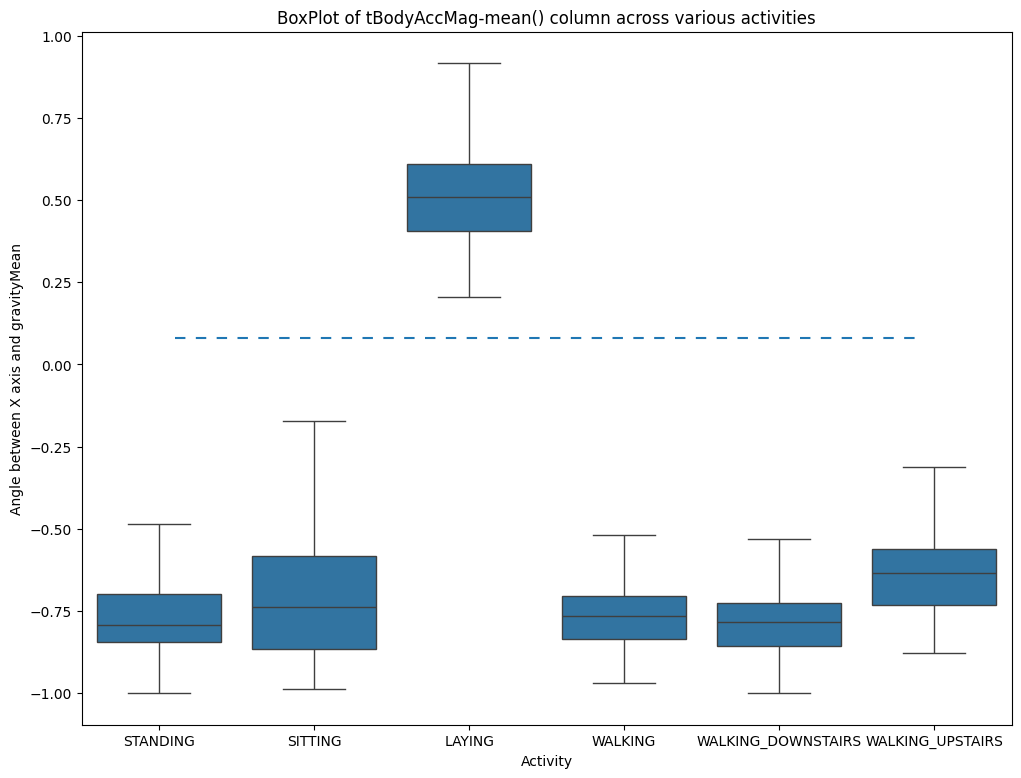

In [18]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.ylabel('Angle between X axis and gravityMean')
plt.title('BoxPlot of tBodyAccMag-mean() column across various activities')
plt.axhline(y= 0.08, xmin=0.1, xmax = 0.9, dashes=(5, 5))
plt.show()

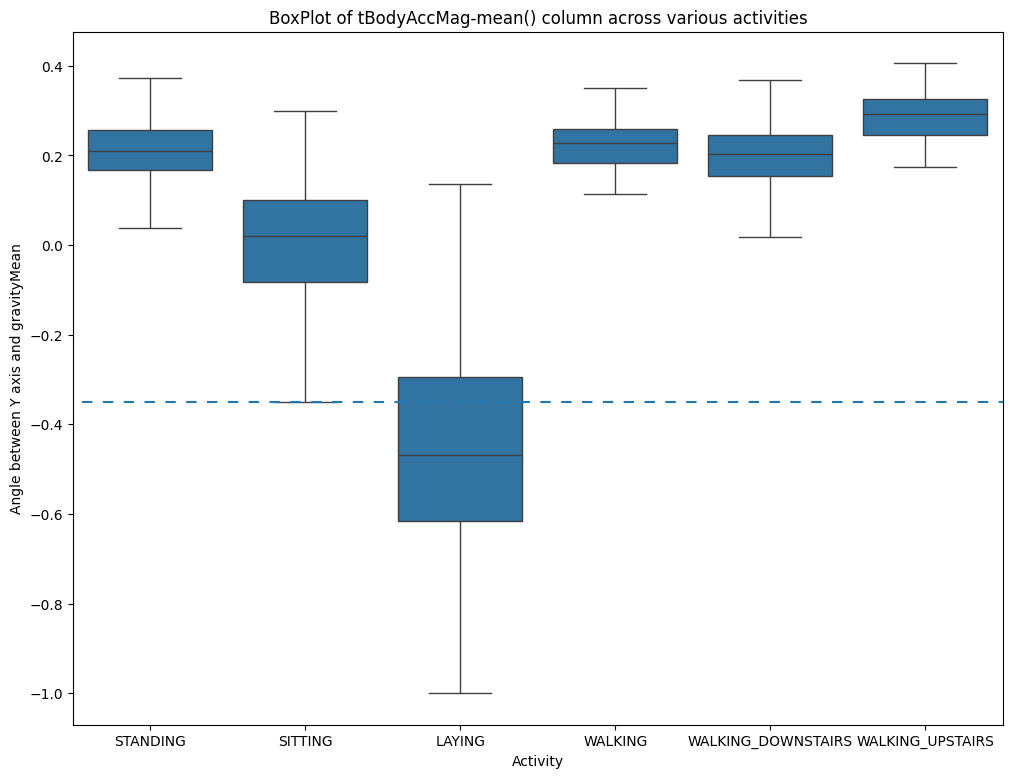

In [19]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False)
plt.ylabel('Angle between Y axis and gravityMean')
plt.title('BoxPlot of tBodyAccMag-mean() column across various activities')
plt.axhline(y= -0.35, xmin=0.01, dashes=(5, 5))
plt.show()

In [25]:
x_pca = train.drop(['subject', 'Activity'], axis=1)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(x_pca)  # Store the transformed data

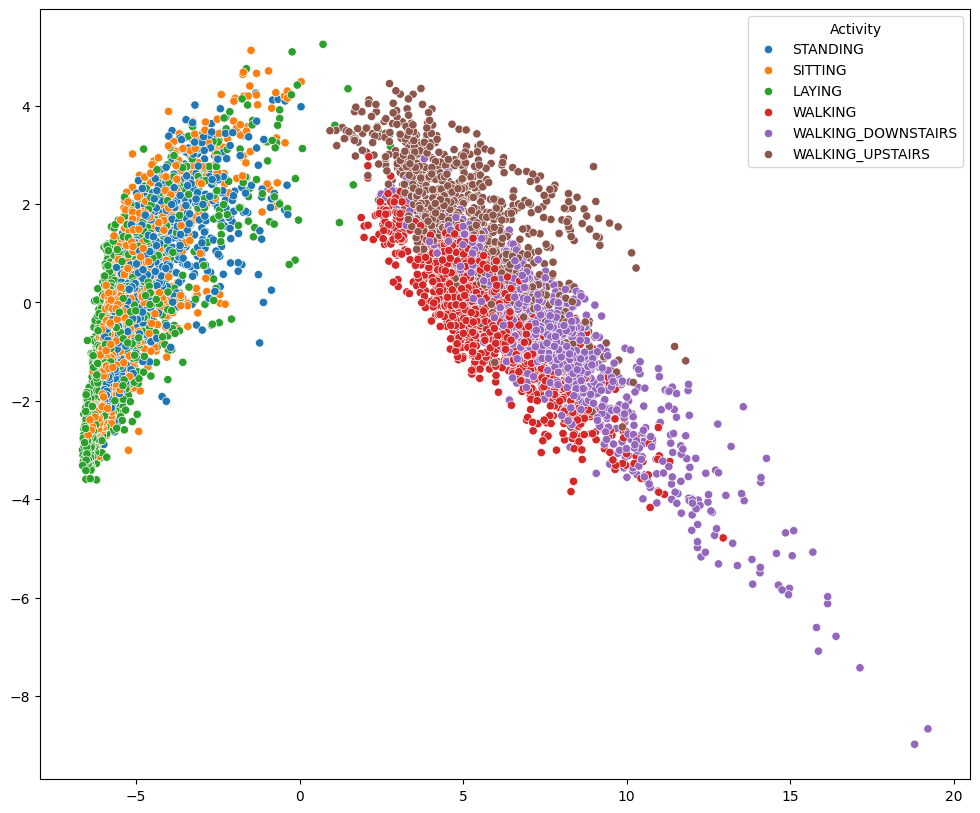

In [26]:
# Plot using scatterplot
plt.figure(figsize=(12, 10))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=train['Activity'])
plt.show()

In [27]:
x_tsne = train.drop(['subject', 'Activity'], axis=1)
tsne = TSNE(n_components=2, random_state=42, n_iter=1000).fit_transform(x_tsne)
tsne

array([[ -6.4673395,  62.785027 ],
       [-25.415068 ,  16.967882 ],
       [-26.97883  ,  20.090446 ],
       ...,
       [ 25.154623 ,  61.397335 ],
       [ 25.101034 ,  61.145786 ],
       [ 24.454817 ,  60.522552 ]], dtype=float32)

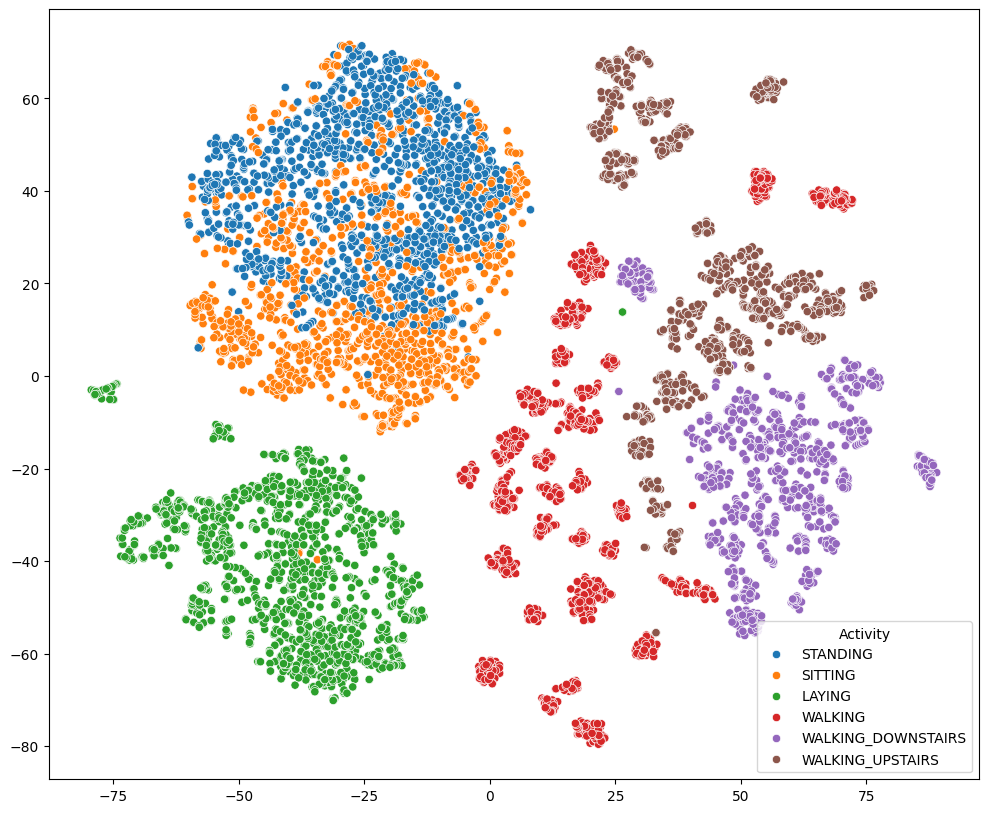

In [28]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train['Activity'])
plt.show()

In [29]:
xtrain = train.drop(['Activity', 'subject'], axis=1)

In [30]:
ytrain = train['Activity']

In [31]:
xtest = test.drop(['Activity', 'subject'], axis=1)
ytest = test['Activity']

In [49]:
iter_params = {'max_iter': [100, 200, 500],  # Max iterations for solver
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga']  # Recommended solvers
    }
lrc = LogisticRegression()
lrc_rs = RandomizedSearchCV(lrc, param_distributions=iter_params, cv=3, random_state=45, n_jobs=-1)
lrc_rs.fit(xtrain, ytrain)
y_pred_lr = lrc_rs.predict(xtest)

In [50]:
lr_accuracy = accuracy_score(ytest, y_pred_lr)
print(f"Logistic regression accuracy: {lr_accuracy}")

Logistic regression accuracy: 0.9606379368849678


In [51]:
cm = confusion_matrix(ytest.values, y_pred_lr)

In [52]:
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 430,  58,   0,   0,   3],
       [  0,  10, 521,   1,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 406,  11],
       [  0,   0,   0,  26,   1, 444]], dtype=int64)

In [53]:
print(f'Best estimator model: {lrc_rs.best_estimator_}')
print(f'Best set of parameters is : {lrc_rs.best_params_}')

Best estimator model: LogisticRegression(C=100, max_iter=500, solver='saga')
Best set of parameters is : {'solver': 'saga', 'max_iter': 500, 'C': 100}


In [55]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 50, 100]
}
svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv=3, random_state=45)
svm_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=45)

In [57]:
y_pred_svm = svm_rs.predict(xtest)

In [59]:
svm_accuracy = accuracy_score(ytest, y_pred_svm)
print(f"Support vector classification regression accuracy: {svm_accuracy}")

Support vector classification regression accuracy: 0.9650492025788938


In [60]:
svm_cm = confusion_matrix(ytest.values, y_pred_svm)

In [61]:
svm_cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 444,  45,   0,   0,   2],
       [  0,  10, 522,   0,   0,   0],
       [  0,   0,   0, 489,   3,   4],
       [  0,   0,   0,   4, 398,  18],
       [  0,   0,   0,  16,   1, 454]], dtype=int64)

In [62]:
print(f'Best estimator model: {svm_rs.best_estimator_}')
print(f'Best set of parameters is : {svm_rs.best_params_}')

Best estimator model: SVC(C=50)
Best set of parameters is : {'kernel': 'rbf', 'C': 50}


In [74]:
decision_parameters = {'max_depth': np.arange(2, 12, 2),
                      'min_samples_split': [2, 5, 10], 
                      'min_samples_leaf': [1, 2, 5, 10],  
                      'criterion': ['gini', 'entropy'] 
                      }
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions=decision_parameters, cv=3, random_state=45)
dt_classifier_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=45)

In [75]:
y_pred_dt = dt_classifier_rs.predict(xtest)

In [80]:
dt_accuracy = accuracy_score(ytest, y_pred_dt)
print(f"decision tree classification regression accuracy: {dt_accuracy}")

decision tree classification regression accuracy: 0.841873091279267


In [81]:
dt_cm = confusion_matrix(ytest.values, y_pred_dt)

In [82]:
dt_cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 395,  96,   0,   0,   0],
       [  0, 107, 425,   0,   0,   0],
       [  0,   0,   0, 449,  41,   6],
       [  0,   0,   0,   9, 363,  48],
       [  0,   0,   0,  86,  73, 312]], dtype=int64)

In [79]:
print(f'Best estimator model: {dt_classifier_rs.best_estimator_}')
print(f'Best set of parameters is : {dt_classifier_rs.best_params_}')

Best estimator model: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=5)
Best set of parameters is : {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 6, 'criterion': 'entropy'}


In [83]:
rf_parameters = {
    'n_estimators': [50, 100, 200],  
    'max_depth': np.arange(2, 20, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}
rf_classifier = RandomForestClassifier()


rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=rf_parameters, cv=3,   random_state=45,)


rf_classifier_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=45)

In [84]:
y_pred_rf = rf_classifier_rs.predict(xtest)

In [85]:
rf_accuracy = accuracy_score(ytest, y_pred_rf)
rf_cm = confusion_matrix(ytest, y_pred_rf)

In [86]:
print(f"Confusion Matrix:\n{rf_cm}")

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 442  49   0   0   0]
 [  0  32 500   0   0   0]
 [  0   0   0 477   6  13]
 [  0   0   0  26 350  44]
 [  0   0   0  33   8 430]]


In [87]:
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

Random Forest Classifier Accuracy: 0.9284017645062775


In [88]:
print(f"Best Estimator Model: {rf_classifier_rs.best_estimator_}")
print(f"Best Parameters: {rf_classifier_rs.best_params_}")

Best Estimator Model: RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=200)
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'entropy'}


In [90]:
print("Original feature count:", xtrain.shape[1])  # X_train is your input data before PCA
print("Retained components after PCA:", pca.n_components_)
reduction_percentage = (1 - (pca.n_components_ / xtrain.shape[1])) * 100
print(f"PCA reduced feature dimensions by {reduction_percentage:.2f}%")

Original feature count: 561
Retained components after PCA: 2
PCA reduced feature dimensions by 99.64%


In [91]:
print(sum(pca.explained_variance_ratio_))  # Shows how much variance the 2 components retain

0.6746746270487949


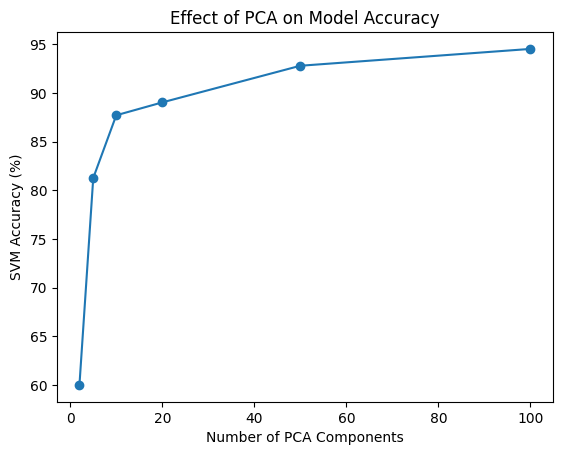

In [96]:
components = [2, 5, 10, 20, 50, 100]  # Different numbers of PCA components
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    xtrain_pca = pca.fit_transform(xtrain)
    xtest_pca = pca.transform(xtest)

    model = SVC()
    model.fit(xtrain_pca, ytrain)
    accuracies.append(model.score(xtest_pca, ytest) * 100)

plt.plot(components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("SVM Accuracy (%)")
plt.title("Effect of PCA on Model Accuracy")
plt.show()

In [99]:
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(train.drop(['subject', 'Activity'], axis=1))
print(sum(pca_5.explained_variance_ratio_))  # Should be much higher than 67.47%

0.7515874626545216
